1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
* GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

<div align='left'><font size="6" color="#FFA500">[LAB 03] Machine Learning </font></div>

## Load Dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import pandas as pd
PATH = "TravelInsurancePrediction.csv" 
df = pd.read_csv(PATH)
df.head()
#ToDo: Show histogram of dataframe

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


`Age` : Tuổi của khách hàng 

`Employment Type` : Nghề của khách hàng

`GraduateOrNot`	 - Khách hàng có tốt nghiệp đại học hay khong (Yes/No)

`AnnualIncome` - Thu nhập hàng năm của khách hàng (Indiaan Rupees)

`FamilyMembers` - Số thành viên trong gia đình của khách hàng

`FamilyMembers` - Cho biết khách hàng có mắc bất kỳ bệnh mãn tính nào hay không (0/1)

`FrequentFlyer` - Khách hàng có bay thường xuyên không (Yes/No)

`EverTravelledAbroad` - Khách hàng đã từng đi nước ngoài chưa (Yes/No)

`TravelInsurance` - Khách hàng đã mua gói bảo hiểm du lịch trong chương trình giới thiệu được tổ chức vào năm 2019 hay không (0,1)

## Data Analysis

Các biến phân loại đang biểu diễn đưới dạng không đồng nhất (0,1) và Yes/No. Để dễ phân tích và xử lý ta quy về Yes/No.

In [26]:
df[["ChronicDiseases", "TravelInsurance"]] = df[["ChronicDiseases", "TravelInsurance"]].replace({1: "Yes", 0: "No"})

In [27]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,Yes,No,No,No
1,1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,No
2,2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,Yes
3,3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,No
4,4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,No


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   object
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   object
dtypes: int64(4), object(6)
memory usage: 155.4+ KB


In [29]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers
count,1987.000000,1987.000000,1.987000e+03,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894
std,573.741812,2.913308,3.768557e+05,1.609650
min,0.000000,25.000000,3.000000e+05,2.000000
25%,496.500000,28.000000,6.000000e+05,4.000000
50%,993.000000,29.000000,9.000000e+05,5.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000
max,1986.000000,35.000000,1.800000e+06,9.000000


Lấy ra cột phân loại và cột số

In [30]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

#remove target and unamed col
categorical_cols.remove('TravelInsurance')
numerical_cols.remove('Unnamed: 0')

Ta xem phân bố của các cột giá trị số

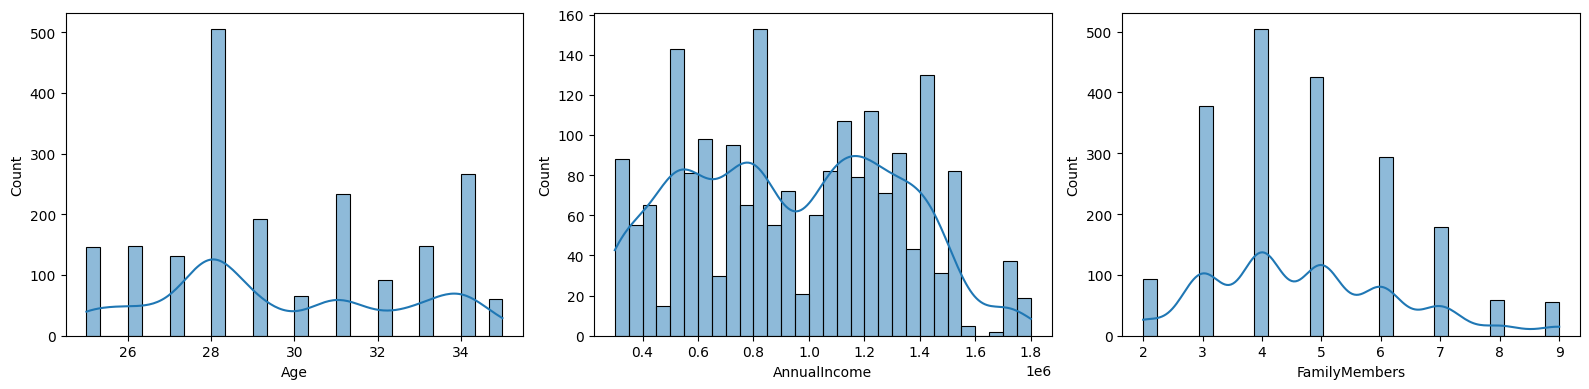

In [31]:
plt.figure(figsize=(16, 4))

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=numerical_cols[i], kde=True, bins=30)

plt.tight_layout()
plt.show()


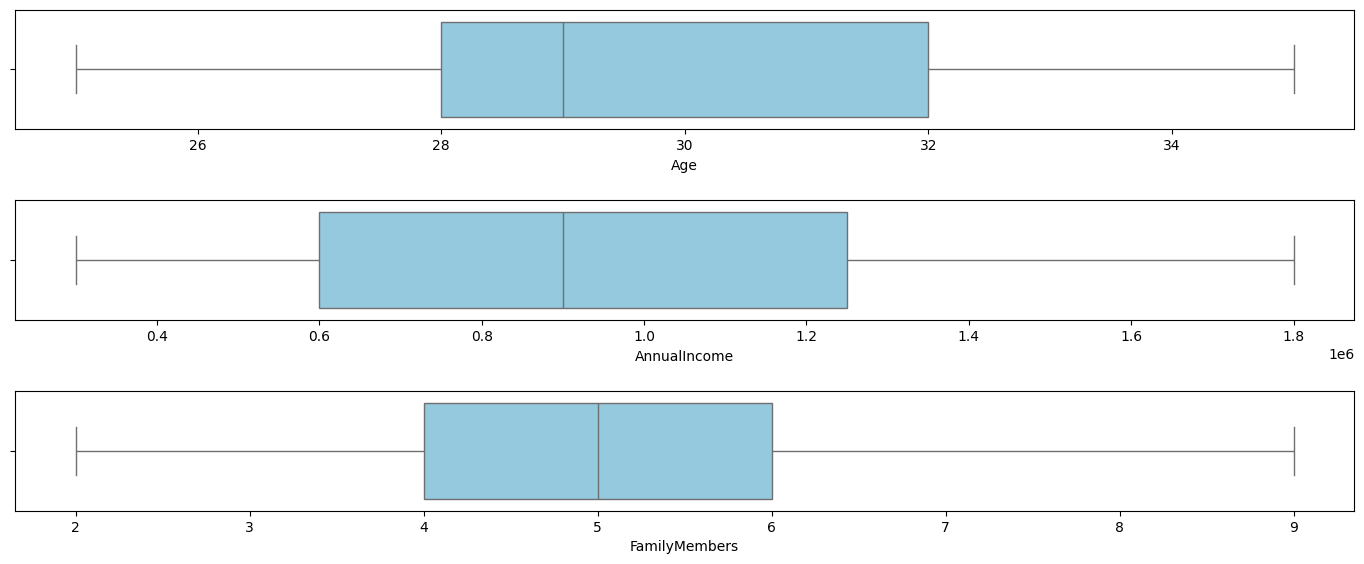

In [32]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)), sharex = False, sharey = False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(data = df, x = column, color='skyblue', ax=axes[i])
plt.tight_layout(pad=2.0)

Các cột phân bố không đồng đều nhưng không có outliers

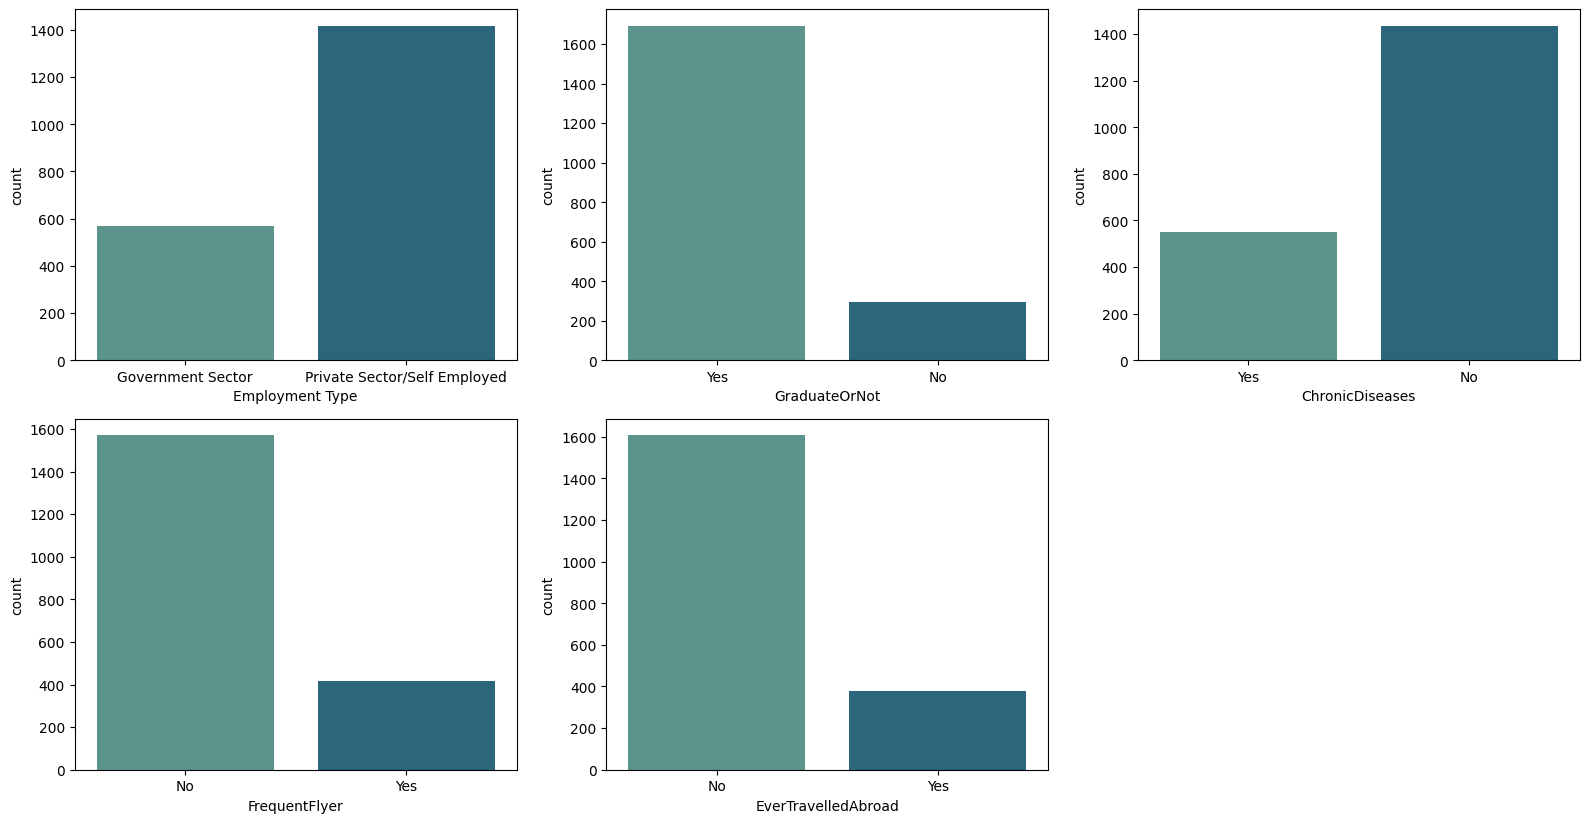

In [33]:
plt.figure(figsize=(16, 12))

for i in range(len(categorical_cols)):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x = categorical_cols[i], hue = categorical_cols[i], palette='crest')

plt.tight_layout()
plt.show()


Các cột phân loại cũng phân phố không đồng đều

Phân phối của target

<Axes: xlabel='TravelInsurance', ylabel='count'>

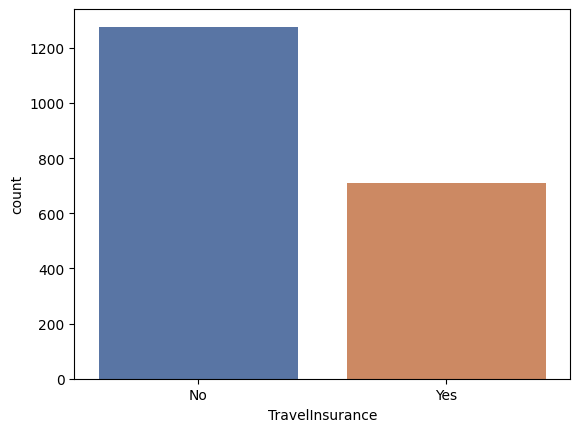

In [34]:
sns.countplot(data=df, x = 'TravelInsurance', hue = 'TravelInsurance', palette='deep')


Nhận thấy dữ liệu không cân bằng nên ta sẽ xử lý

## Preprocessing

Không có giá trị khuyết và dòng lặp nên không cần xử lý

In [35]:
# Kiểm tra missing values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [36]:
#Kiểm tra duplicates
df.duplicated().sum()

0

Không có missing values lẫn duplicates

In [37]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    # Loại bỏ cột không cần thiết
    df.drop("Unnamed: 0", axis=1, inplace=True)
    return df

In [38]:
df = preprocessing_data(df.copy())

In [39]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,Yes
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,No


## Feature Engineering

<Axes: >

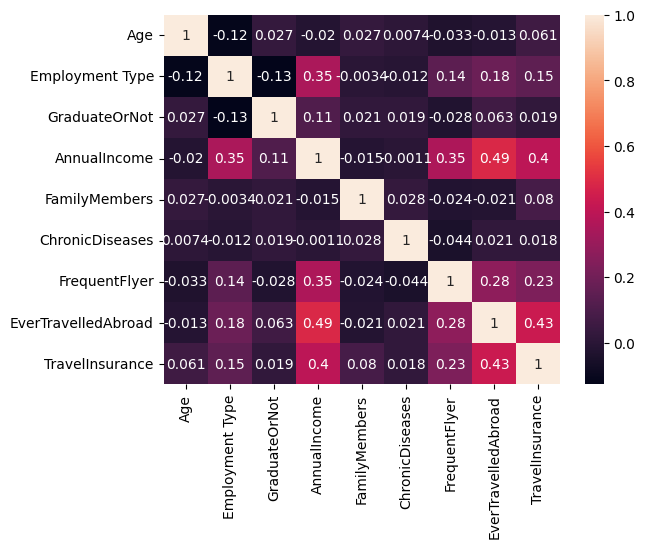

In [40]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
    for col in categorical_cols:
        df[col] = df[col].astype("category").cat.codes

    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr(), annot=True) # Show heatmap after normalized data

In [41]:
# df = df.drop(['Age','GraduateOrNot','FamilyMembers','ChronicDiseases'], axis = 1)    

In [42]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(['TravelInsurance'], axis = 1)
    y = df['TravelInsurance']
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

In [43]:
from imblearn.over_sampling import SMOTE
data_oversampled=dataset.copy()
data_oversampled.TARGET.value_counts()

NameError: name 'dataset' is not defined

In [ ]:
#setting TARGET variable SMOTE
X=data_oversampled.drop("TARGET",axis=1)
y=data_oversampled.TARGET

In [ ]:
X_smote,y_smote=SMOTE().fit_sample(X,y)


## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 123
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

### Evaluate

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report
def calculate_performance(y_true, y_pred):
    """
    Calculate performance metrics such as accuracy, precision, recall, F1-score, confusion matrix, and classification report
    :param y_true: Ground truth values
    :param y_pred: Predictions
    :return: main_score
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion matrix:\n", confusion)
    print("Classification report:\n", report)
    main_score = f1
    return main_score

### Simple Model (Model 1)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Model training
naive_model = GaussianNB()
naive_model.fit(trainX, trainY)
y_pred_train = naive_model.predict(trainX)
y_pred_test = naive_model.predict(testX)

In [ ]:
print("Train set:\n")
train_score_1 = calculate_performance(trainY, y_pred_train)

Train set:

Accuracy: 0.7410071942446043
Precision: 0.7119113573407202
Recall: 0.5009746588693957
F1-score: 0.5881006864988558
Confusion matrix:
 [[773 104]
 [256 257]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       877
           1       0.71      0.50      0.59       513

    accuracy                           0.74      1390
   macro avg       0.73      0.69      0.70      1390
weighted avg       0.74      0.74      0.73      1390



In [ ]:
print("Test set:\n")
test_score_1 = calculate_performance(testY, y_pred_test)

Test set:

Accuracy: 0.7839195979899497
Precision: 0.7266666666666667
Recall: 0.5532994923857868
F1-score: 0.6282420749279539
Confusion matrix:
 [[359  41]
 [ 88 109]]
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       400
           1       0.73      0.55      0.63       197

    accuracy                           0.78       597
   macro avg       0.76      0.73      0.74       597
weighted avg       0.78      0.78      0.78       597



### Model 2 sử dụng `GridSearchCV` với `MinMaxScaler`, `PCA`

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    model = GaussianNB()
    scaler = MinMaxScaler()
    pca = PCA()
    operation = [("scaler", scaler),("pca", pca),("gauss", model)]
    model = Pipeline(steps=operation)
    param_grid = {
        "scaler__feature_range": [(-1, 1), (0, 1)],
        "pca__n_components": [5,6,7,8],
        "gauss__var_smoothing": np.logspace(-4, -9, num=100)
        }
    grid_search = GridSearchCV(model, param_grid, n_jobs=2, cv = 8,return_train_score=True)
    grid_search.fit(X, y)

    return grid_search


In [ ]:
model = build_model(trainX,trainY)


y_pred_train = model.predict(trainX)
y_pred_test = model.predict(testX)
model

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA()),
                                       ('gauss', GaussianNB())]),
             n_jobs=2,
             param_grid={'gauss__var_smoothing': array([1.00000000e-04, 8.90215085e-05, 7.92482898e-05, 7.05480231e-05,
       6.28029144e-05, 5.59081018e-05, 4.97702356e-05, 4.43062146e-05,
       3.94420606e-05, 3.51119173e-05, 3.12571585e-05, 2.78255940e-05,
       2.47707636...
       9.11162756e-09, 8.11130831e-09, 7.22080902e-09, 6.42807312e-09,
       5.72236766e-09, 5.09413801e-09, 4.53487851e-09, 4.03701726e-09,
       3.59381366e-09, 3.19926714e-09, 2.84803587e-09, 2.53536449e-09,
       2.25701972e-09, 2.00923300e-09, 1.78864953e-09, 1.59228279e-09,
       1.41747416e-09, 1.26185688e-09, 1.12332403e-09, 1.00000000e-09]),
                         'pca__n_components': [5, 6, 7, 8],
                         'scaler__feature_range': [(-1, 1), (0, 1)]},
             return_train_score=True)

In [ ]:
model.best_params_

{'gauss__var_smoothing': 0.0001,
 'pca__n_components': 8,
 'scaler__feature_range': (-1, 1)}

In [ ]:
print("Train set:\n")
train_score_2 =calculate_performance(trainY, y_pred_train)

Train set:

Accuracy: 0.758273381294964
Precision: 0.7521367521367521
Recall: 0.5146198830409356
F1-score: 0.6111111111111112
Confusion matrix:
 [[790  87]
 [249 264]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       877
           1       0.75      0.51      0.61       513

    accuracy                           0.76      1390
   macro avg       0.76      0.71      0.72      1390
weighted avg       0.76      0.76      0.75      1390



In [ ]:
print("Test set:\n")
test_score_2 = calculate_performance(testY, y_pred_test)

Test set:

Accuracy: 0.7939698492462312
Precision: 0.7341772151898734
Recall: 0.5888324873096447
F1-score: 0.6535211267605634
Confusion matrix:
 [[358  42]
 [ 81 116]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.85       400
           1       0.73      0.59      0.65       197

    accuracy                           0.79       597
   macro avg       0.77      0.74      0.75       597
weighted avg       0.79      0.79      0.79       597



### Conclusion

In [ ]:
measures = {
    "Train set": [train_score_1, train_score_2],
    "Test set": [test_score_1, test_score_2]
}

measures = pd.DataFrame(measures, index=["Model 1","Model 2"])
measures

,Train set,Test set
Model 1,0.588101,0.628242
Model 2,0.611111,0.653521


Model thứ 2 là model tốt nhất

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return """
Metric em chọn là F1 vì nó cân bằng giữa precision và recall phù hợp cho imbalanced data
Scaler là MinMaxScaler, Giảm chiều dữ liệu PCA và Model GaussianNB
Param của nó là 
- gauss__var_smoothing': 0.0001,
- pca__n_components': 8,
- scaler__feature_range': (-1, 1)
"""

In [ ]:
print(get_conclusion())


Metric em chọn là F1 vì nó cân bằng giữa precision và recall phù hợp cho imbalanced data
Scaler là MinMaxScaler, Giảm chiều dữ liệu PCA và Model GaussianNB
Param của nó là 
- gauss__var_smoothing': 0.0001,
- pca__n_components': 8,
- scaler__feature_range': (-1, 1)

